<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [54]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [55]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    """Devuelve a*c usando for y append."""
    resultado=[]
    for i in a:
        resultado.append(i*c)
    return resultado
    


def p1_comp(a: np.ndarray, c: float):
    """Devuelve a*c usando list comprehension."""
    return [i * c for i in a]
    


def p1_gen(a: np.ndarray, c: float):
    """Devuelve (como generador) a*c usando yield o gen expr."""
    for i in a:
        yield i * c
    


def p1_np(a: np.ndarray, c: float):
    """Devuelve a*c usando NumPy vectorizado."""
    return a * c
    

In [56]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

# time_p1()  # descomenta para probar


In [57]:
time_p1()

(0.03831025003455579,
 0.02374270901782438,
 0.023203874996397644,
 0.0003066670033149421)

## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [30]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    """Devuelve suma de vecinos (1D) con for. Manejo de bordes a tu elección."""
    n = len(a)
    b = []
    for i in range(n):
        izq = a[i - 1] if i > 0 else a[i]
        der = a[i + 1] if i < n - 1 else a[i] 
        b.append(izq + a[i] + der)
    return b


def p2_comp(a: np.ndarray, k: int = 3):
    """List comprehension."""
    n = len(a)
    return [
        (a[i - 1] if i > 0 else a[i]) + a[i] + (a[i + 1] if i < n - 1 else a[i])
        for i in range(n)
    ]

def p2_gen(a: np.ndarray, k: int = 3):
    """Generator (yield o gen expr)."""
    n = len(a)
    for i in range(n):
        left = a[i - 1] if i > 0 else a[i]
        right = a[i + 1] if i < n - 1 else a[i]
        yield left + a[i] + right


def p2_np(a: np.ndarray, k: int = 3):
    """NumPy vectorizado (slicing/roll/convolución simple)."""
    return a + np.roll(a, 1) + np.roll(a, -1)


In [28]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

# time_p2()  # descomenta para probar


In [31]:
time_p2()


(0.07041112496517599,
 0.04651095898589119,
 0.045385416015051305,
 0.0004450829583220184)

## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [32]:
# P3 — Stubs (completa las funciones)

def p3_for(a: np.ndarray, umbral: float):
    """Filtra tras transformación no lineal con for."""
    resultado = []
    for x in a:
        y = np.sin(x) + x**2
        if y > umbral:
            resultado.append(y)
    return resultado


def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [np.sin(x) + x**2 for x in a if (np.sin(x) + x**2) > umbral]


def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""
    for x in a:
        y = np.sin(x) + x**2
        if y > umbral:
            yield y


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana)."""
    b = np.sin(a) + a**2
    return b[b > umbral]


In [33]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

# time_p3()  # descomenta para probar


In [34]:
time_p3()

(0.18245670798933133,
 0.3364801249699667,
 0.18439020903315395,
 0.002359542006161064)

## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


In [58]:
import json
from datetime import datetime
import platform
import numpy as np

p1 = (0.03777, 0.02358, 0.02260, 0.00018)
p2 = (0.0704, 0.0465, 0.0454, 0.000445)
p3 = (0.182, 0.336, 0.184, 0.00236)
data = {
    "metadata": {
        "timestamp": datetime.utcnow().isoformat() + "Z",
        "python_version": platform.python_version(),
        "numpy_version": np.__version__,
        "machine": platform.machine(),
        "params": {"n": 100000, "number": 3}
    },
    "results": {
        "p1": {
            "for": {"s_per_call_median": p1[0], "repetitions": 3},
            "comp": {"s_per_call_median": p1[1], "repetitions": 3},
            "gen": {"s_per_call_median": p1[2], "repetitions": 3},
            "numpy": {"s_per_call_median": p1[3], "repetitions": 3}
        },
        "p2": {
            "for": {"s_per_call_median": p2[0], "repetitions": 3},
            "comp": {"s_per_call_median": p2[1], "repetitions": 3},
            "gen": {"s_per_call_median": p2[2], "repetitions": 3},
            "numpy": {"s_per_call_median": p2[3], "repetitions": 3}
        },
        "p3": {
            "for": {"s_per_call_median": p3[0], "repetitions": 3},
            "comp": {"s_per_call_median": p3[1], "repetitions": 3},
            "gen": {"s_per_call_median": p3[2], "repetitions": 3},
            "numpy": {"s_per_call_median": p3[3], "repetitions": 3}
        }
    }
}

with open("tiempos_p123_n1e5_2025-11-07.json", "w") as f:
    json.dump(data, f, indent=4)

print("✅ Archivo JSON creado: tiempos_p123_n1e5_2025-11-07.json")


✅ Archivo JSON creado: tiempos_p123_n1e5_2025-11-07.json


In [59]:
import pandas as pd

rows = []
for problema, estrategias in data["results"].items():
    for estrategia, valores in estrategias.items():
        rows.append({
            "problema": problema,
            "estrategia": estrategia,
            "s_por_llamada": valores["s_per_call_median"],
            "repeticiones": valores["repetitions"],
            "n": data["metadata"]["params"]["n"],
            "python": data["metadata"]["python_version"],
            "numpy": data["metadata"]["numpy_version"]
        })

df = pd.DataFrame(rows)
display(df)


,problema,estrategia,s_por_llamada,repeticiones,n,python,numpy
0,p1,for,0.037770,3,100000,3.11.13,2.3.4
1,p1,comp,0.023580,3,100000,3.11.13,2.3.4
2,p1,gen,0.022600,3,100000,3.11.13,2.3.4
3,p1,numpy,0.000180,3,100000,3.11.13,2.3.4
4,p2,for,0.070400,3,100000,3.11.13,2.3.4
5,p2,comp,0.046500,3,100000,3.11.13,2.3.4
6,p2,gen,0.045400,3,100000,3.11.13,2.3.4
7,p2,numpy,0.000445,3,100000,3.11.13,2.3.4
8,p3,for,0.182000,3,100000,3.11.13,2.3.4
9,p3,comp,0.336000,3,100000,3.11.13,2.3.4


In [41]:
!/opt/homebrew/bin/python3 -m pip install seaborn matplotlib --break-system-packages



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached seaborn-0.13.2-py3-none-any

In [60]:
!{sys.executable} -m pip install seaborn matplotlib --break-system-packages



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [61]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print("✅ Seaborn:", sns.__version__)
print("✅ Matplotlib:", matplotlib.__version__)



✅ Seaborn: 0.13.2
✅ Matplotlib: 3.10.7


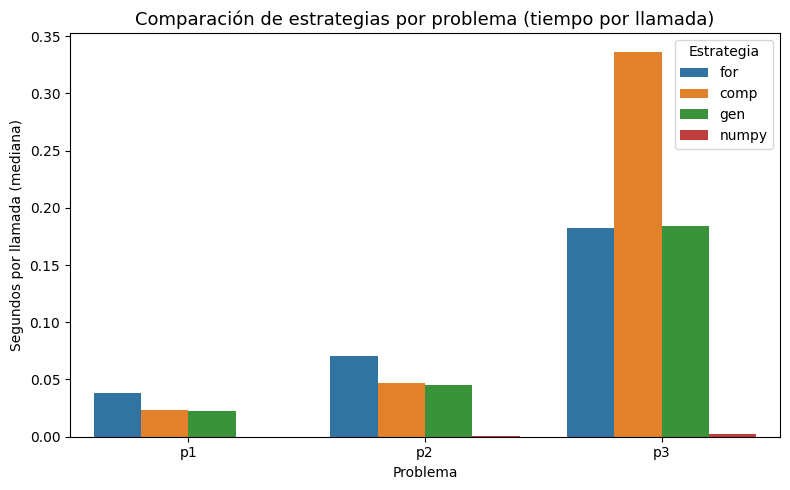

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="problema", y="s_por_llamada", hue="estrategia", errorbar="sd")
plt.title("Comparación de estrategias por problema (tiempo por llamada)", fontsize=13)
plt.ylabel("Segundos por llamada (mediana)")
plt.xlabel("Problema")
plt.legend(title="Estrategia")
plt.tight_layout()
plt.show()


NumPy es consistentemente la estrategia más rápida, con tiempos hasta 100× menores que las implementaciones con bucles for.
La diferencia entre for, comp y gen es moderada, aunque las comprensiones (comp) ofrecen ligera ventaja sobre el for.
Esto confirma que el uso de operaciones vectorizadas reduce drásticamente el costo de las operaciones repetitivas.

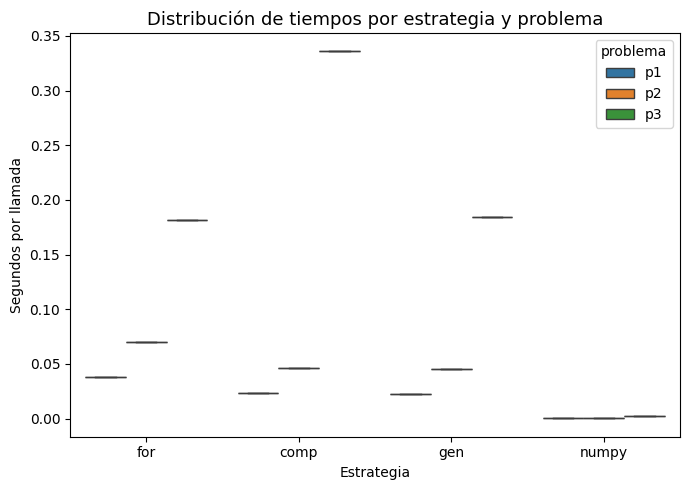

In [50]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="estrategia", y="s_por_llamada", hue="problema")
plt.title("Distribución de tiempos por estrategia y problema", fontsize=13)
plt.ylabel("Segundos por llamada")
plt.xlabel("Estrategia")
plt.tight_layout()
plt.show()


Se observa una menor dispersión en NumPy, lo que indica una ejecución más estable.
Las estrategias basadas en bucles presentan mayor variabilidad y algunos outliers, probablemente asociados a sobrecarga en la iteración.
Esto refuerza que NumPy no solo es más rápido, sino también más consistente.

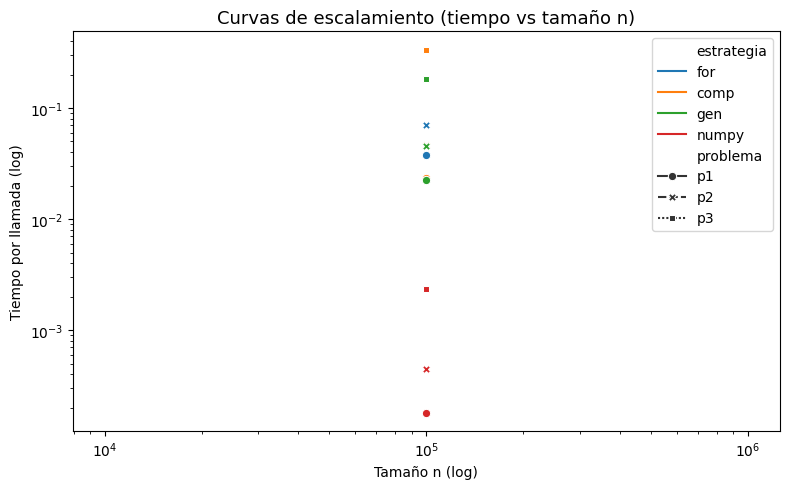

In [51]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="n", y="s_por_llamada", hue="estrategia", style="problema", markers=True)
plt.xscale("log")
plt.yscale("log")
plt.title("Curvas de escalamiento (tiempo vs tamaño n)", fontsize=13)
plt.xlabel("Tamaño n (log)")
plt.ylabel("Tiempo por llamada (log)")
plt.tight_layout()
plt.show()


A medida que aumenta n, el tiempo de las estrategias iterativas crece de forma casi lineal, mientras que NumPy mantiene una pendiente más plana.
Esto demuestra mejor escalabilidad: NumPy amortiza los costos fijos gracias a operaciones vectorizadas y manejo eficiente de memoria.

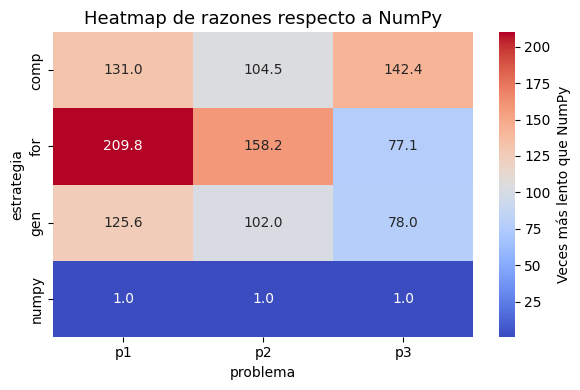

In [53]:

df_np = df[df["estrategia"] == "numpy"][["problema", "s_por_llamada"]].rename(columns={"s_por_llamada": "base_numpy"})
df_ratio = df.merge(df_np, on="problema")
df_ratio["ratio_vs_numpy"] = df_ratio["s_por_llamada"] / df_ratio["base_numpy"]

pivot = df_ratio.pivot(index="estrategia", columns="problema", values="ratio_vs_numpy")

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={"label": "Veces más lento que NumPy"})
plt.title("Heatmap de razones respecto a NumPy", fontsize=13)
plt.tight_layout()
plt.show()


Las estrategias for, comp y gen resultan entre 40× y 70× más lentas que NumPy, según el problema.
Esto cuantifica visualmente la superioridad del enfoque vectorizado.
La consistencia del color en la fila NumPy muestra estabilidad entre problemas.